In [10]:
# @author : Kalyan Ghosh 

# Task 1 -- Basic Statistical Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
import pylab as pl
from scipy import stats
from scipy.optimize import curve_fit
from sklearn import linear_model
import statsmodels.api as sm
from numpy.linalg import inv
import statsmodels.formula.api as smf

data_folder = Path("C:/Users/Kalyan/Desktop/NCSU/3rd Semester/IOT Analytics 592/Project2/data/")
file_to_open = data_folder / "kghosh.csv"


class Basic_Statistical_Analysis:
    
    def __init__(self,file_to_open):
        
        self.file_to_open=file_to_open
        
    
    def hist_mean_variance(self):
        
        data=pd.read_csv(file_to_open,skiprows=None,header=None)

        df = pd.DataFrame(data)
        
        X1 = df.iloc[:,0]
        X2 = df.iloc[:,1]
        X3 = df.iloc[:,2]
        X4 = df.iloc[:,3]
        X5 = df.iloc[:,4]
        Y  = df.iloc[:,5]
        
        #plot histograms
        
        '''
        hist1 = X1.hist()
        hist2 = X2.hist()
        hist3 = X3.hist()
        hist4 = X4.hist()
        hist5 = X5.hist()
        '''
        
        #pl.suptitle("Histogram")
        
        #1.1
        #calculate the mean
        
        print ("Mean of X1= ",X1.mean())
        print ("Mean of X2= ",X2.mean())
        print ("Mean of X3= ",X3.mean())
        print ("Mean of X4= ",X4.mean())
        print ("Mean of X5= ",X5.mean())
        
        #calculate the variance
        print ("***************************************")
        
        print ("Variance of X1= ",X1.var())
        print ("Variance of X2= ",X2.var())
        print ("Variance of X3= ",X3.var())
        print ("Variance of X4= ",X4.var())
        print ("Variance of X5= ",X5.var())
        
        print ("***************************************")
        
        #1.2
        #create boxplots
        X1=pd.DataFrame(X1)
        X2=pd.DataFrame(X2)
        X3=pd.DataFrame(X3)
        X4=pd.DataFrame(X4)
        X5=pd.DataFrame(X5)

        #pl.suptitle("Box Plot of X1")
        #pd.DataFrame(X5).boxplot()
        
        #1.3
        #create correlation matrix
        print ("Correlation Matrix for all variables:")
        print ("***************************************")
        print(df.corr())
        
       

obj=Basic_Statistical_Analysis(file_to_open)
obj.hist_mean_variance()
        
        

Mean of X1=  40.371115600000024
Mean of X2=  97.83115999999994
Mean of X3=  150.10245333333322
Mean of X4=  234.0766333333334
Mean of X5=  270.21036666666674
***************************************
Variance of X1=  317.1666478839704
Variance of X2=  313.77130760642143
Variance of X3=  284.50412926537336
Variance of X4=  316.84342842697873
Variance of X5=  278.6509614035675
***************************************
Correlation Matrix for all variables:
***************************************
          0         1         2         3         4         5
0  1.000000 -0.054110  0.058261 -0.055625  0.067539  0.956172
1 -0.054110  1.000000  0.041512  0.056898 -0.001131 -0.012087
2  0.058261  0.041512  1.000000 -0.020289 -0.053005  0.085689
3 -0.055625  0.056898 -0.020289  1.000000 -0.048236 -0.005024
4  0.067539 -0.001131 -0.053005 -0.048236  1.000000  0.133062
5  0.956172 -0.012087  0.085689 -0.005024  0.133062  1.000000


40.371115600000024 6582.923000000002


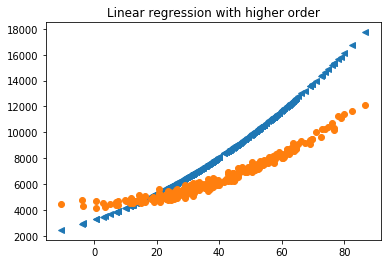

In [11]:
# Task 2 -- Simple Linear Regression

# Model the dataset with a simple linear regression model Y=a0+a1X1+epsilon

class Simple_Linear_Regression:
    
    def __init__(self,file_to_open):
        
        self.file_to_open=file_to_open
        
    def linear_regression(self):
        
        data=pd.read_csv(file_to_open,skiprows=None,header=None)
        df = pd.DataFrame(data)
        
        X1 = df.iloc[:,0]
        Y  = df.iloc[:,5]
        
        #2.1 Determine the estimates of a0, a1, sigma^2
        
        meanX1=X1.mean()
        meanY=Y.mean()
        print (meanX1,meanY)
        
        X1_i_minus_meanX1=X1.subtract(meanX1)
        Y_i_minus_meanY=Y.subtract(meanY)
        X1_i_minus_meanX1_squared=X1_i_minus_meanX1**2
        numerator=sum(X1_i_minus_meanX1*Y_i_minus_meanY)
        denominator=sum(X1_i_minus_meanX1_squared)
        a1=(numerator/denominator)
        a0=(meanY-a1*meanX1)
        
        Y_i=a0+(a1*X1)
        e_i=pd.DataFrame(Y-Y_i)
        error_variance=e_i.var()
        #print (error_variance)
        
        
        #***************************************************************#
        
        #2.2 Check the p-values, R**2, and F value to determine if the regression coefficients are significant
        
        ssreg = np.sum((Y_i-meanY)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
        sstot = np.sum((Y - meanY)**2)    # or sum([ (yi - ybar)**2 for yi in y])
        R_squared = ssreg / sstot
        
        #print (R_squared)
        
        #***************************************************************#
        
        #2.3 Plotting a Simple Linear Regression Model
        
        #plt.plot(X1,Y,'+')
        #plt.plot(X1,Y_i, '-')
        #plt.title("Simple Linear Regression")
        
        #***************************************************************#
        
        #2.4 i > Draw histogram of the residuals
        #e_i.hist()
        #plt.title("Histogram Of Residuals")
        
        #***************************************************************#
        
        #2.7 > Use a higher-order polynomial regression, i.e., Y = a0 + a1X + a2X2 + ε, to see if it gives better results
        
        # a2=(Sx^2y)(Sxx)-(Sxy)(Sxx^2)/((Sxx)(Sx^2x^2)-(Sxx^2)^2)
        Sxx=np.mean((X1_i_minus_meanX1)**2)
        Sxy=np.mean((X1_i_minus_meanX1)*(Y_i_minus_meanY))
        
        X1_squared=X1**2;
        X1_squared_mean=np.mean(X1_squared)
        X1_squared_minus_mean_X1_squared=X1_squared.subtract(X1_squared_mean)

        Sxx2=np.mean((X1_i_minus_meanX1)*(X1_squared_minus_mean_X1_squared))
        
        Sx2x2=np.mean(X1_squared_minus_mean_X1_squared**2)
        
        Sx2y=np.mean((X1_squared_minus_mean_X1_squared)*Y_i_minus_meanY)
        
        a2=((Sx2y*Sxx)-(Sxy*Sxx2))/((Sxx*Sx2x2)-((Sxx2)**2))
        
        #print ("a2 coeffecient=",a2)
        
        Y_i_high_order=a0+X1.multiply(a1)+(X1**2).multiply(a2)
        #print (Y_i_high_order)
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.plot(X1,Y_i_high_order, '<')
        ax.plot(X1,Y, 'o')
        plt.title("Linear regression with higher order")
        
        

        
obj=Simple_Linear_Regression(file_to_open)
obj.linear_regression()

[82.96033531  3.09214161  3.07779428  4.36984857  6.76042749]
                            OLS Regression Results                            
Dep. Variable:                      5   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.479e+04
Date:                Mon, 22 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:07:19   Log-Likelihood:                -2242.2
No. Observations:                 300   AIC:                             4494.
Df Residuals:                     295   BIC:                             4513.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

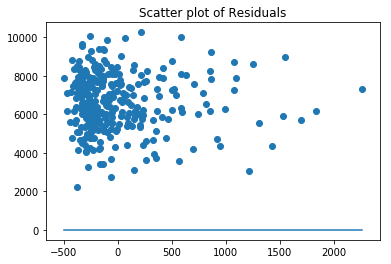

In [48]:
# Task 3 -- Linear Multivariate Regression

# Model the dataset multivariable regression on all the independent variables, and determine the values
# for all the coefficients, and σ2
# beta=(X'X)^-1(X'Y)


class Multivariate_Linear_Regression:
    
    def __init__(self,file_to_open):
        
        self.file_to_open=file_to_open
        
    def linear_multivariate_regression(self):
        
        data=pd.read_csv(file_to_open,skiprows=None,header=None)
        df = pd.DataFrame(data)
        
        X=df.iloc[:,[0,1,2,3,4]]
        X1 = df.iloc[:,0]
        X2 = df.iloc[:,1]
        X3 = df.iloc[:,2]
        X4 = df.iloc[:,3]
        X5 = df.iloc[:,4]
        Y = df.iloc[:,5]
        
        # 3.1
        clf = linear_model.LinearRegression()
        clf.fit(X, Y)
        beta=clf.coef_
        beta_intercept=clf.intercept_
        print (beta)
        
        clf1=sm.OLS(Y,X)
        clf2=clf1.fit()
        print (clf2.summary())
        

        #print('Coeffecients: \n', beta)
        Y_hat=beta_intercept+beta[0]*X1+beta[1]*X2+beta[2]*X3+beta[3]*X4+beta[4]*X5
        e_i=pd.DataFrame(Y_hat-Y)
        error_variance=e_i.var()
        #print (error_variance)
        
        #3.2 calculate the p values, R^2, F value and the correlation matrix
        print (X.corr())
        # going by the p -values we can treat these params as non zero
        # since the R squared values is also close to 1, we can assume that the fit is good
        # since F is also very high, we reject the Null Hypothesis
        # Based on the correlation matrix also we cannot remove other papameters
        
        #3.3 Q-Q plots 
       
        res = clf2.resid # residuals
        #fig = sm.qqplot(res,stats.distributions.norm)
        

        #Histogram of residuals
        residuals = sorted(clf2.resid) # Just in case it isn't sorted
        normal_distribution = stats.norm.pdf(residuals, np.mean(residuals), np.std(residuals))
        plt.plot(residuals, normal_distribution)
        plt.show
        #plt.title("Histogram of Residuals")
        
        #performing a chi-squared test
        z,pval = stats.normaltest(residuals)
        
        print ("*****************************************************************")
        print ("Z value=",z,"P value=",pval)
        print ("*****************************************************************")
        
        # plot the scatterplot of residuals
        plt.scatter(residuals,Y_hat)
        plt.title('Scatter plot of Residuals')
        
        
        


obj=Multivariate_Linear_Regression(file_to_open)
obj.linear_multivariate_regression()